In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [5]:
inception_v3 = tf.keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False
)

87910968/87910968 [==============================] - 0s 0us/step


In [6]:
def load_img(img_path):
  img = tf.io.read_file(img_path) #read file from disk
  img = tf.io.decode_jpeg(img,channels=3) #load as tensor
  img = tf.keras.layers.Resizing(299, 299)(img) #resizing
  img = img /255. #normalize
  return img #return


def  get_feature_vector(img_path):
     img = load_img(img_path)
     img = tf.expand_dims(img, axis=0) #batch axis
     feature_vector = inception_v3(img)
     return img, feature_vector




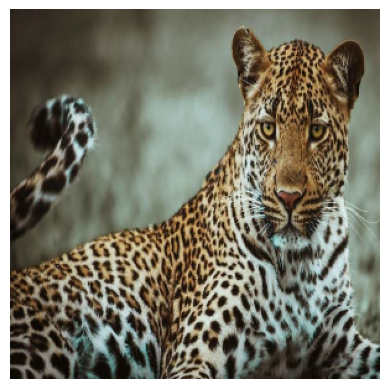


Input image size : (1, 299, 299, 3)
Feature vector size : (1, 8, 8, 2048)


In [8]:
img, feature_vector = get_feature_vector('/content/leopard.jpg')

plt.imshow(np.squeeze(img, axis=0))
plt.axis('off')
plt.show()

print()
print('Input image size :' , img.shape)
print('Feature vector size :', feature_vector.shape)
